In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

data_frame = pd.read_csv("skin-cancer-mnist-ham10000/HAM10000_metadata.csv")

# Drop multiple images for same lesion so each lesion_id has only one associated image
data_frame.drop_duplicates("lesion_id", keep="first", inplace=True)

data_frame

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear
6,HAM_0002761,ISIC_0029176,bkl,histo,60.0,male,face
8,HAM_0005132,ISIC_0025837,bkl,histo,70.0,female,back
10,HAM_0001396,ISIC_0025276,bkl,histo,55.0,female,trunk
11,HAM_0004234,ISIC_0029396,bkl,histo,85.0,female,chest
13,HAM_0001949,ISIC_0025767,bkl,histo,70.0,male,trunk
15,HAM_0007207,ISIC_0031326,bkl,histo,65.0,male,back
16,HAM_0001601,ISIC_0025915,bkl,histo,75.0,male,upper extremity


### Type:



Distribution types of cells.

,lesion_id,image_id,dx,dx_type,age,sex,localization,type,type_id
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,Benign keratosis-like lesions,2
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,Benign keratosis-like lesions,2
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,Benign keratosis-like lesions,2
6,HAM_0002761,ISIC_0029176,bkl,histo,60.0,male,face,Benign keratosis-like lesions,2
8,HAM_0005132,ISIC_0025837,bkl,histo,70.0,female,back,Benign keratosis-like lesions,2
10,HAM_0001396,ISIC_0025276,bkl,histo,55.0,female,trunk,Benign keratosis-like lesions,2
11,HAM_0004234,ISIC_0029396,bkl,histo,85.0,female,chest,Benign keratosis-like lesions,2
13,HAM_0001949,ISIC_0025767,bkl,histo,70.0,male,trunk,Benign keratosis-like lesions,2
15,HAM_0007207,ISIC_0031326,bkl,histo,65.0,male,back,Benign keratosis-like lesions,2
16,HAM_0001601,ISIC_0025915,bkl,histo,75.0,male,upper extremity,Benign keratosis-like lesions,2


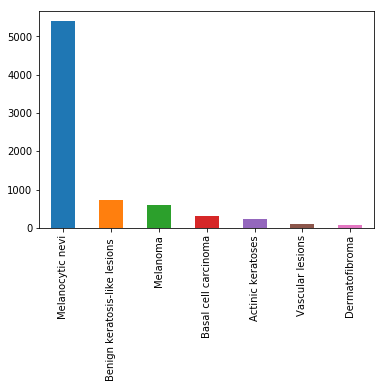

In [3]:
type_dict = {
    'nv'   : 'Melanocytic nevi',
    'mel'  : 'Melanoma',
    'bkl'  : 'Benign keratosis-like lesions ',
    'bcc'  : 'Basal cell carcinoma',
    'akiec': 'Actinic keratoses',
    'vasc' : 'Vascular lesions',
    'df'   : 'Dermatofibroma'
}

data_frame["type"] = data_frame["dx"].map(type_dict.get)

data_frame["type"].value_counts().plot(kind="bar")

# Each cell type has a code
data_frame["type_id"] = pd.Categorical(data_frame["type"]).codes

data_frame

### Images:


In [4]:
import os
from glob import glob

from PIL import Image
from keras.preprocessing.image import ImageDataGenerator
from pathlib import Path
from pathlib import PurePath

path_dict = {}

pathlist1 = Path("skin-cancer-mnist-ham10000/HAM10000_images_part_1").glob('**/*.jpg') 
pathlist2 = Path("skin-cancer-mnist-ham10000/HAM10000_images_part_2").glob('**/*.jpg')

for path in pathlist1:
    path_str = str(path)
    filename = PurePath(path_str).stem
    path_dict[filename] = path_str
    
for path in pathlist2:
    path_str = str(path)
    filename = PurePath(path_str).stem
    path_dict[filename] = path_str
    
data_frame["path"] = data_frame["image_id"].map(path_dict.get)


data_frame["image"] = data_frame["path"].map(lambda x: np.asarray(Image.open(x).resize((100,75))))

Using TensorFlow backend.


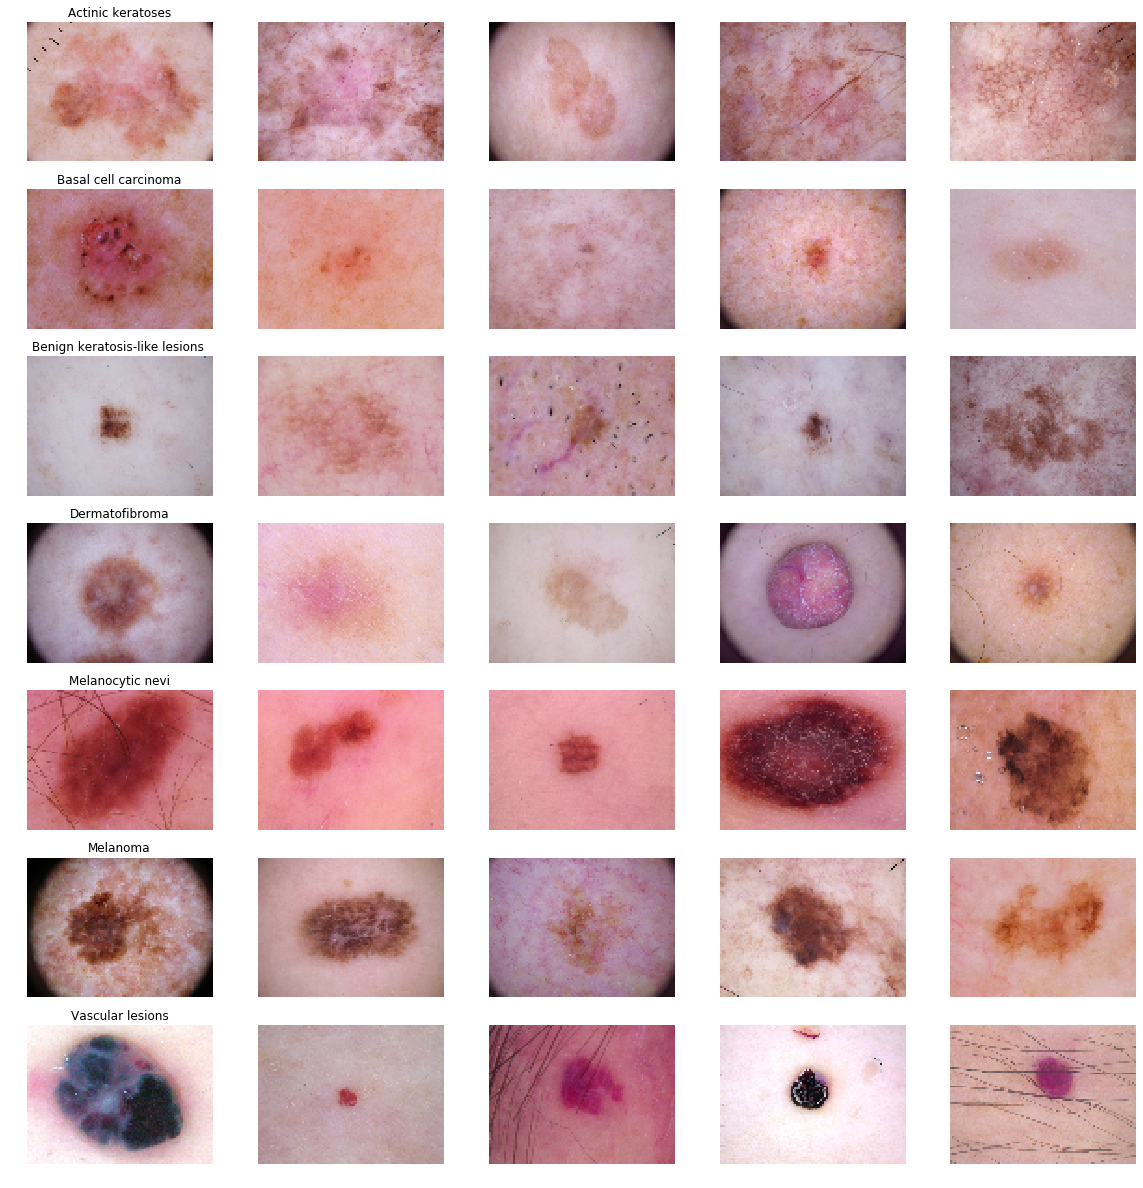

In [5]:
n = 5
fig,m_axs = plt.subplots(7,n,figsize=(4*n,3*7))
for n_axs, (type_name,type_rows) in zip(m_axs,data_frame.sort_values(['type']).groupby('type')):
    n_axs[0].set_title(type_name)
    for c_ax,(_,c_row) in zip(n_axs,type_rows.sample(n,random_state=9).iterrows()):
        c_ax.imshow(c_row['image'])
        c_ax.axis('off')
fig.savefig('samples.png',dpi=300)


In [ ]:
rgb_info_df = data_frame.apply(lambda x: pd.Series({'{}_mean'.format(k): v for k, v in 
                                  zip(['Red', 'Green', 'Blue'], 
                                      np.mean(x['image'], (0, 1)))}),1)
gray_col_vec = rgb_info_df.apply(lambda x: np.mean(x), 1)
for c_col in rgb_info_df.columns:
    rgb_info_df[c_col] = rgb_info_df[c_col]/gray_col_vec
rgb_info_df['Gray_mean'] = gray_col_vec
rgb_info_df.sample(3)

,Red_mean,Green_mean,Blue_mean,Gray_mean
2644,1.047917,0.953022,0.999061,182.838800
6489,1.515748,0.750701,0.733551,131.759467
5476,1.290978,0.843199,0.865822,180.382800


C:\Users\rasik\Anaconda3\envs\mlenv\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


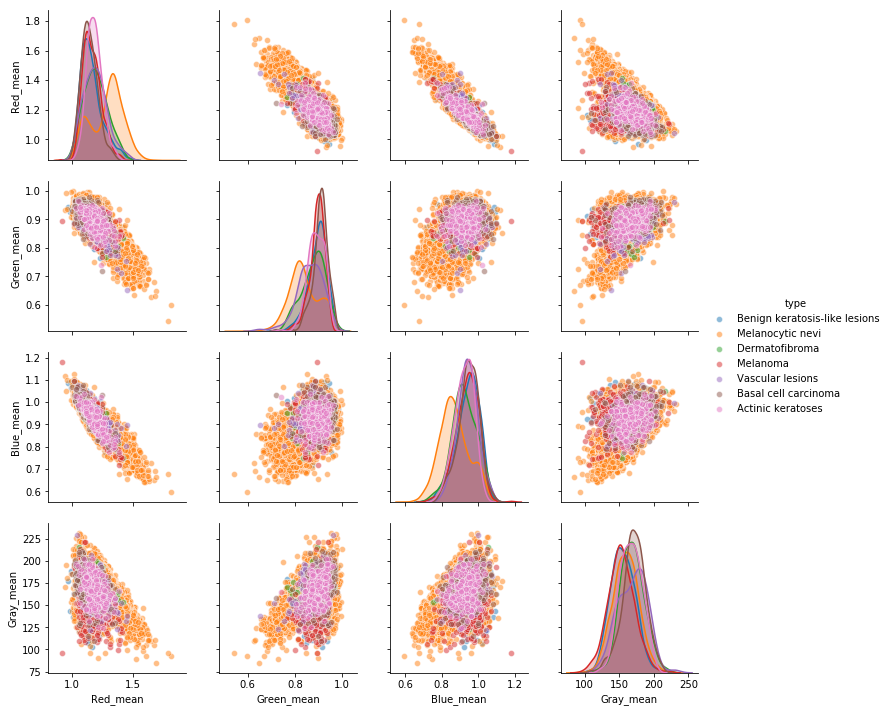

In [ ]:
import seaborn as sns

for c_col in rgb_info_df.columns:
    data_frame[c_col] = rgb_info_df[c_col].values

sns.pairplot(data_frame[['Red_mean', 'Green_mean', 'Blue_mean', 'Gray_mean', 'type']], 
             hue='type', plot_kws = {'alpha': 0.5})

In [ ]:
import tensorflow as tf
import keras
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical

y = data_frame.type_id

# train test split
x_train_o, x_test_o, y_train_o, y_test_o = train_test_split(data_frame, y, test_size=0.25)

# Get training and test images from columns
x_train = np.asarray(x_train_o['image'].tolist())
x_test = np.asarray(x_test_o['image'].tolist())

x_train_mean = np.mean(x_train)
x_train_std = np.std(x_train)

x_test_mean = np.mean(x_test)
x_test_std = np.std(x_test)

# Feature scaling
x_train = (x_train - x_train_mean)/x_train_std
x_test = (x_test - x_test_mean)/x_test_std

# One-hot encoding
y_train = to_categorical(y_train_o, num_classes = 7)
y_test = to_categorical(y_test_o, num_classes = 7)

In [ ]:
# training and validation split
x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size = 0.1, random_state = 2)

# Reshape image in 3 dimensions (height = 75px, width = 100px , canal = 3)
x_train = x_train.reshape(x_train.shape[0], *(75, 100, 3))
x_test = x_test.reshape(x_test.shape[0], *(75, 100, 3))
x_validate = x_validate.reshape(x_validate.shape[0], *(75, 100, 3))

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras import backend as K

input_shape = (75, 100, 3)
num_classes = 7

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 73, 98, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 96, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 35, 48, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 35, 48, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 107520)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               13762688  
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

In [ ]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [ ]:
batch_size = 32
epochs = 12

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_validate,y_validate))

Train on 5041 samples, validate on 561 samples
Epoch 1/12
5041/5041 [==============================] - 182s 36ms/step - loss: 1.3300 - acc: 0.7126 - val_loss: 0.7525 - val_acc: 0.7344
Epoch 2/12
5041/5041 [==============================] - 176s 35ms/step - loss: 0.7732 - acc: 0.7344 - val_loss: 0.6970 - val_acc: 0.7451
Epoch 3/12
5024/5041 [============================>.] - ETA: 0s - loss: 0.6894 - acc: 0.7520

In [ ]:
# model validation
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])